In [101]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Grab and process the raw data.
data_path = ("amazon_cells_labelled.txt")
amaz_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amaz_raw.columns = ['message', 'complim']

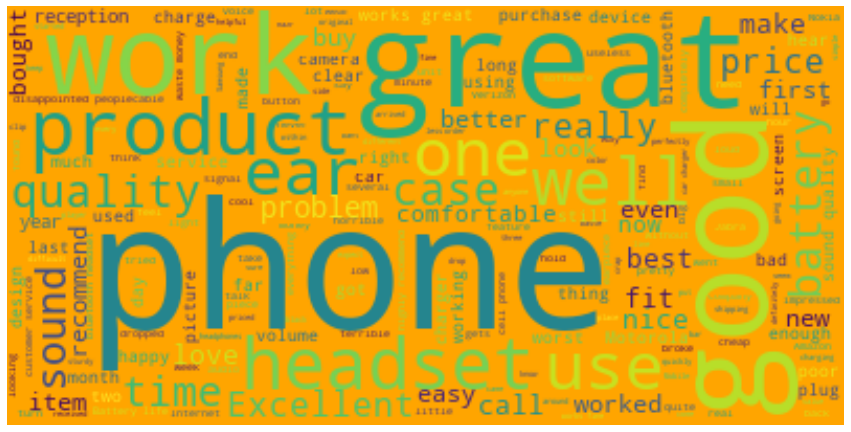

In [103]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(amaz_raw["message"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


In [104]:

# Enumerate our spammy keywords.
keywords = ['Good', 'GREAT', 'worked', 'quality', 'reccomend', 
            'EXCELLENT', 'WONDERFUL', 'NICE', 'FANTASTIC', 'CONVENIENT', 
            'best', 'fine', 'well', 'love', 'really reccomend']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amaz_raw[str(key)] = amaz_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

\
amaz_raw['complim'] = (amaz_raw['complim'] == 1)
data = amaz_raw[keywords]
target = amaz_raw['complim']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [97]:
print (y_pred)

[False  True False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True False False False False False False False  True False
 False False  True False  True False False False False False False False
  True False False False False False  True  True False False False False
 False False  True False False False False False False  True False False
 False False False False False  True  True False False  True False False
 False False False False  True False False False False False False False
 False False  True False False False False  True False  True False  True
  True False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False False False Fa

In [105]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 387


In [113]:
 print(data.shape[0])

1000


In [108]:
# Display our results.
print("Ratio of mislabeled points: {}".format(
    (target != y_pred).sum()/data.shape[0])
     )


Ratio of mislabeled points: 0.387
